In [27]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential, load_model
from keras.layers import Dense, SimpleRNN, Dropout, Lambda, LSTM, GRU, Bidirectional
from sklearn.preprocessing import StandardScaler
#import warnings
#warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Customers_in_a_Shop.csv', header=None)
df.head()

,0,1
0,1949-01,114.0
1,1949-02,120.0
2,1949-03,134.0
3,1949-04,67.0
4,1949-05,123.0


In [3]:
df.columns={"Date","Customers"}
print(df.isnull().sum())

Date         0
Customers    4
dtype: int64


In [4]:
df['Date'] = pd.to_datetime(df['Date'],format="%Y-%m")
df = df.set_index('Date')
df

,Customers
Date,
1949-01-01,114.0
1949-02-01,120.0
1949-03-01,134.0
1949-04-01,67.0
1949-05-01,123.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,720.0


In [5]:
missing = df[df.isna().any(axis=1)]
print(missing)

            Customers
Date                 
1951-06-01        NaN
1951-07-01        NaN
1954-06-01        NaN
1960-03-01        NaN


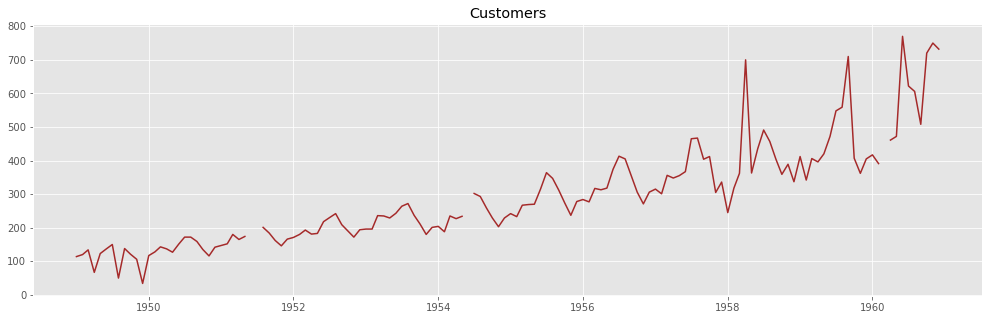

In [6]:
#from matplotlib import style
#print(plt.style.available)

plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(17,5)

plt.plot(df, color='brown')
plt.title("Customers")
plt.show()

## Imputing missing values

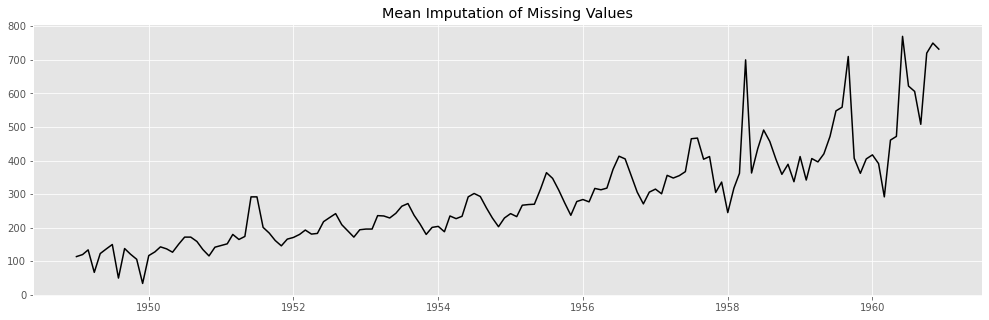

In [7]:
## Comparing several types of interpolations - mean 
plt.rcParams['figure.figsize']=(17,5)
df['Customers_mean'] = df['Customers'].fillna(df['Customers'].mean())
plt.plot(df['Customers_mean'],color='black')
plt.title("Mean Imputation of Missing Values")
plt.show()

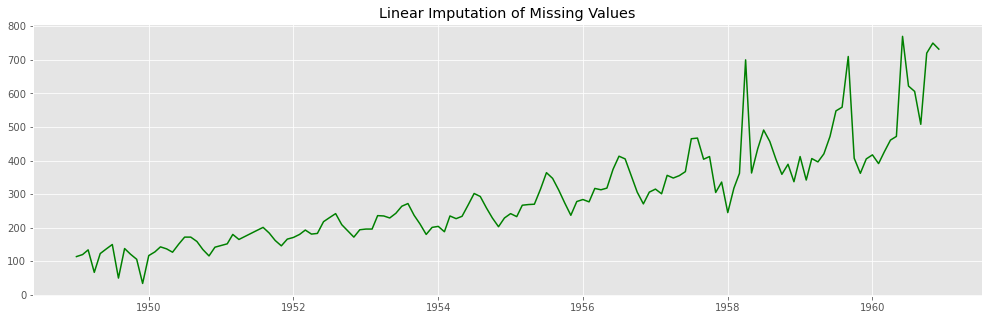

In [8]:
## Comparing several types of interpolations - linear
plt.rcParams['figure.figsize']=(17,5)
df['Customers_linear'] = df['Customers'].interpolate(method='linear')
plt.plot(df['Customers_linear'],color='green')
plt.title("Linear Imputation of Missing Values")
plt.show()

In [9]:
df1 = df['1949-06':'1960-06':12]
df1

,Customers,Customers_mean,Customers_linear
Date,,,
1949-06-01,137.0,137.000000,137.0
1950-06-01,151.0,151.000000,151.0
1951-06-01,NaN,291.878571,183.0
1952-06-01,218.0,218.000000,218.0
1953-06-01,243.0,243.000000,243.0
1954-06-01,NaN,291.878571,268.0
1955-06-01,315.0,315.000000,315.0
1956-06-01,374.0,374.000000,374.0
1957-06-01,367.0,367.000000,367.0


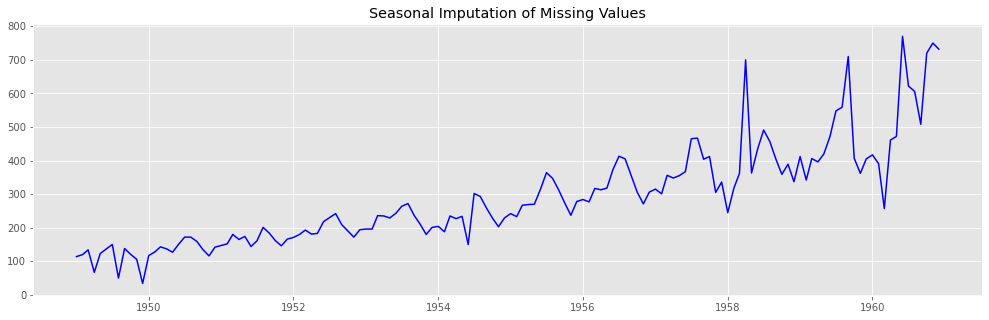

In [10]:
## Comparing several types of interpolations - seasonal interpolation
df.loc['1960-03'].fillna((df['1949-03':'1959-03':12].sum())/df['1949-03':'1959-03':12].shape[0], inplace=True)
df.loc['1954-06'].fillna((df['1949-06':'1953-06':12].sum())/(df['1949-06':'1953-06':12].shape[0]), inplace=True)
df.loc['1951-07'].fillna((df['1949-07':'1950-07':12].sum())/(df.loc['1949-07':'1950-07':12].shape[0]), inplace=True)
df.loc['1951-06'].fillna((df['1949-06':'1950-06':12].sum())/(df['1949-06':'1950-06':12].shape[0]), inplace=True)

plt.rcParams['figure.figsize']=(17,5)
plt.plot(df['Customers'],color='blue')
plt.title("Seasonal Imputation of Missing Values")
plt.show()

In [11]:
df['Customers'].sort_values(ascending=False).head(7)

Date
1960-06-01    770.0
1960-11-01    750.0
1960-12-01    732.0
1960-10-01    720.0
1959-09-01    710.0
1958-04-01    700.0
1960-07-01    622.0
Name: Customers, dtype: float64

## Normality plots 

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Customers', ylabel='Density'>

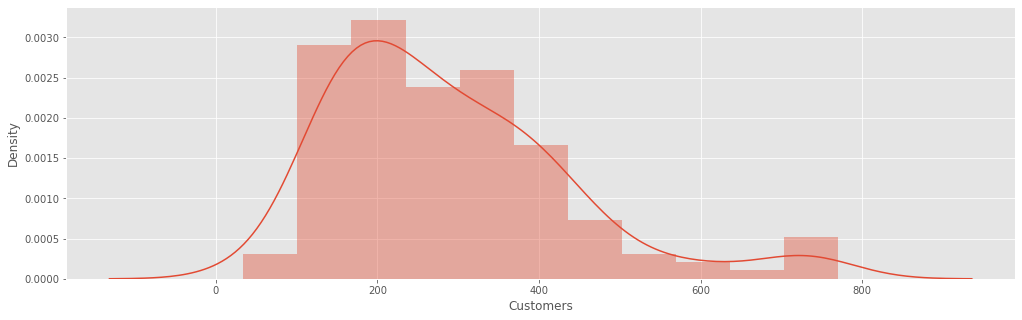

In [12]:
sns.distplot(df['Customers'])

((array([-2.58977345, -2.26833208, -2.08397164, -1.95134078, -1.84615093,
         -1.75813779, -1.68195358, -1.61444188, -1.55357684, -1.49797725,
         -1.44665728, -1.39888755, -1.35411252, -1.31189888, -1.27190175,
         -1.23384196, -1.19749012, -1.16265539, -1.12917712, -1.09691879,
         -1.06576327, -1.03560932, -1.00636876, -0.97796428, -0.95032771,
         -0.92339857, -0.89712296, -0.87145259, -0.84634402, -0.82175802,
         -0.797659  , -0.77401457, -0.75079515, -0.72797364, -0.70552513,
         -0.68342667, -0.66165704, -0.64019656, -0.61902697, -0.59813124,
         -0.57749349, -0.55709882, -0.53693331, -0.51698381, -0.49723799,
         -0.47768418, -0.45831134, -0.43910901, -0.42006725, -0.40117661,
         -0.38242807, -0.36381301, -0.34532319, -0.32695068, -0.30868788,
         -0.29052747, -0.27246238, -0.25448578, -0.23659106, -0.21877178,
         -0.2010217 , -0.18333474, -0.16570495, -0.14812651, -0.13059373,
         -0.11310101, -0.09564283, -0.

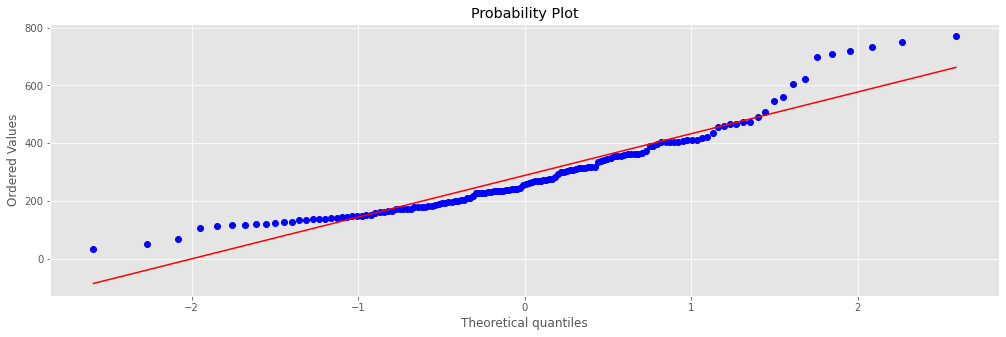

In [13]:
import scipy.stats
import pylab 
scipy.stats.probplot(df['Customers'],plot=pylab)
# pylab.show()

# Y-Axis: Data Value
# X-Axis: 

# Naive Decomposition
### Additive Seasonal Decomposition

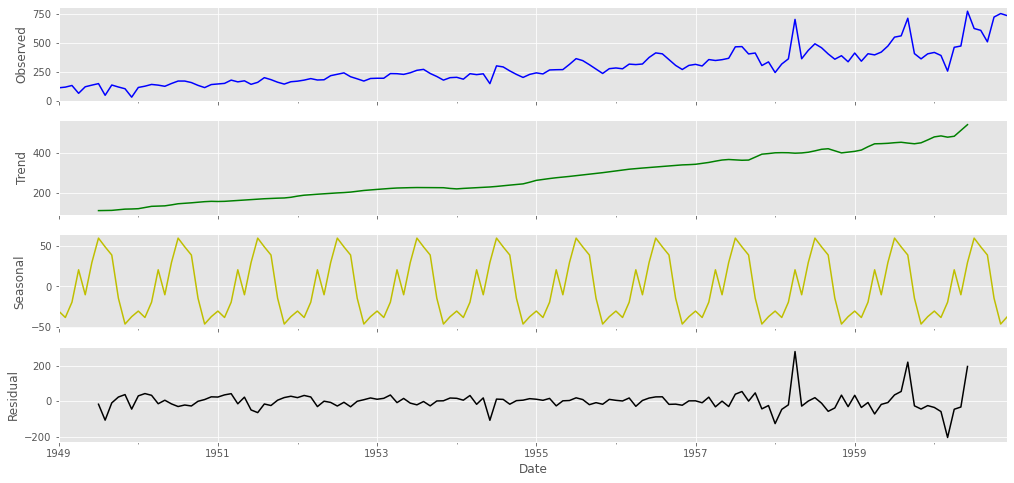

In [14]:
import statsmodels.api as sm

plt.rcParams['figure.figsize'] = (17,8)

decomposition = sm.tsa.seasonal_decompose(df['Customers'], model='additive')
#decomposition.plot()

fig, axes = plt.subplots(4, 1, sharex=True)

decomposition.observed.plot(ax=axes[0], legend=False, color='b')
axes[0].set_ylabel('Observed')
decomposition.trend.plot(ax=axes[1], legend=False, color='g')
axes[1].set_ylabel('Trend')
decomposition.seasonal.plot(ax=axes[2], legend=False, color='y')
axes[2].set_ylabel('Seasonal')
decomposition.resid.plot(ax=axes[3], legend=False, color='k')
axes[3].set_ylabel('Residual')                           
plt.show()

### Multiplicative Seasonal Decomposition

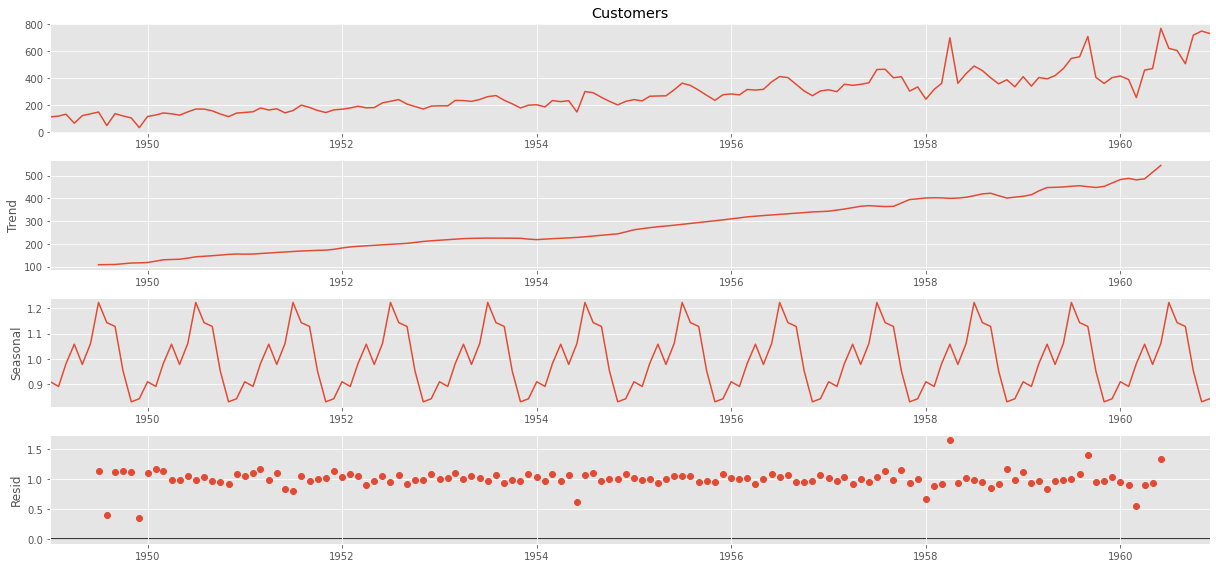

In [15]:
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (17,8)

decomposition = sm.tsa.seasonal_decompose(df['Customers'], model='multiplicative')
fig = decomposition.plot()
plt.show()

## Splitting Train and Test data

In [16]:
length = int(np.round(len(df["Customers_linear"])*0.8))
print(length)

115


In [17]:
df.drop(columns=["Customers_mean","Customers_linear"], inplace=True)
df.index.freq = 'MS'

In [18]:
## iF removing of the index is needed.
#df.reset_index(drop=True, inplace=True)
#df

In [19]:
train = df.iloc[:length,:]
train

,Customers
Date,
1949-01-01,114.0
1949-02-01,120.0
1949-03-01,134.0
1949-04-01,67.0
1949-05-01,123.0
...,...
1958-03-01,362.0
1958-04-01,700.0
1958-05-01,363.0


In [20]:
test = df.iloc[length:,: ]
test

,Customers
Date,
1958-08-01,457.000000
1958-09-01,404.000000
1958-10-01,359.000000
1958-11-01,389.000000
1958-12-01,337.000000
1959-01-01,412.000000
1959-02-01,342.000000
1959-03-01,406.000000
1959-04-01,396.000000


In [21]:
SC = StandardScaler()
train = SC.fit_transform(train)
test = SC.transform(test)
train

array([[-1.21245702],
       [-1.15425422],
       [-1.0184477 ],
       [-1.66837891],
       [-1.12515282],
       [-0.9893463 ],
       [-0.86324024],
       [-1.83328683],
       [-0.97964583],
       [-1.14455375],
       [-1.29006074],
       [-1.98849429],
       [-1.18335562],
       [-1.07665049],
       [-0.9311435 ],
       [-0.9893463 ],
       [-1.08635096],
       [-0.85353978],
       [-0.64982999],
       [-0.64982999],
       [-0.77593605],
       [-1.00874723],
       [-1.19305608],
       [-0.94084397],
       [-0.89234164],
       [-0.84383931],
       [-0.57222627],
       [-0.71773325],
       [-0.63042906],
       [-0.92144304],
       [-0.75653512],
       [-0.36851648],
       [-0.5334244 ],
       [-0.74683465],
       [-0.90204211],
       [-0.70803279],
       [-0.65953046],
       [-0.57222627],
       [-0.44612021],
       [-0.5625258 ],
       [-0.54312487],
       [-0.20360856],
       [-0.08720297],
       [ 0.02920262],
       [-0.29091276],
       [-0

## Recurrent Neural Network (RNN), Long Short-Term Memory (LSTM), Bidirectional LSTM, and Gated Recurrent Unit (GRU)

### Change Data to RNN Architecture

In [23]:
stepsize = 18 #Should be optimized!

def RNN_Structure(df, stepsize):
    X =[]
    Y =[]
    
    for n in range(len(df) - stepsize):
        z = n + stepsize
        X.append(df[n:z,]) #sample =10
        Y.append(df[z,])   #sample = 11 is your label
        
    return np.array(X) , np.array(Y)

        
X_train ,Y_train =  RNN_Structure(train, stepsize)
X_test  , Y_test =  RNN_Structure(test, stepsize)

In [24]:
print(X_train.shape) # X_train value with step = 10
print(X_test.shape)  # X_Test value with step = 10
print(Y_train.shape) # X_train value with step = 10
print(Y_test.shape)  # X_Test value with step = 10

(97, 18, 1)
(11, 18, 1)
(97, 1)
(11, 1)


* First Argument: Sample size
* Second Argument: Time Step
* Third Argument: Number of Feature

**(Sample size, Step Lenght/Sequence Lenght, Number of Input Feature/ Input Value to RNN)**

In [25]:
## Not necessary for this series, since already done in the previous definition function. But in case:

# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# print(X_train.shape)
# print(X_test.shape)

In [26]:
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
Y_train = np.asarray(Y_train).astype(np.float32)
Y_test = np.asarray(Y_test).astype(np.float32)

### Simple RNN

In [26]:
model = Sequential()
model.add(SimpleRNN(units = 512, activation ="LeakyReLU"))
model.add(Dense(32, activation="LeakyReLU"))
model.add(Dense(32, activation="LeakyReLU"))
model.add(Dense(1, activation="LeakyReLU"))
model.compile(loss ="mean_absolute_error", optimizer='adam', metrics="logcosh")

In [27]:
memory = model.fit(X_train, Y_train , epochs = 1000, batch_size = 100, verbose = 1)

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 0.7274 - logcosh: 0.3271
Epoch 2/1000
1/1 [==============================] - 0s 50ms/step - loss: 0.5998 - logcosh: 0.2394
Epoch 3/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.4787 - logcosh: 0.1634
Epoch 4/1000
1/1 [==============================] - 0s 49ms/step - loss: 0.6777 - logcosh: 0.3147
Epoch 5/1000
1/1 [==============================] - 0s 51ms/step - loss: 0.3537 - logcosh: 0.1093
Epoch 6/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.8096 - logcosh: 0.3723
Epoch 7/1000
1/1 [==============================] - 0s 51ms/step - loss: 0.3889 - logcosh: 0.1305
Epoch 8/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.4526 - logcosh: 0.1536
Epoch 9/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.4792 - logcosh: 0.1664
Epoch 10/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.4856 - logcosh: 0.1694
Epoch 11/1000
1/1 [==

1/1 [==============================] - 0s 45ms/step - loss: 0.0707 - logcosh: 0.0076
Epoch 166/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.0745 - logcosh: 0.0080
Epoch 167/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.0629 - logcosh: 0.0060
Epoch 168/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.0653 - logcosh: 0.0065
Epoch 169/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.0676 - logcosh: 0.0082
Epoch 170/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.0738 - logcosh: 0.0084
Epoch 171/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.0759 - logcosh: 0.0094
Epoch 172/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.0754 - logcosh: 0.0089
Epoch 173/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.0567 - logcosh: 0.0059
Epoch 174/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.0695 - logcosh: 0.0077
Epoch 175/1000


1/1 [==============================] - 0s 44ms/step - loss: 0.0394 - logcosh: 0.0034
Epoch 248/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.0339 - logcosh: 0.0031
Epoch 249/1000
1/1 [==============================] - 0s 49ms/step - loss: 0.0322 - logcosh: 0.0030
Epoch 250/1000
1/1 [==============================] - 0s 51ms/step - loss: 0.0376 - logcosh: 0.0037
Epoch 251/1000
1/1 [==============================] - 0s 52ms/step - loss: 0.0455 - logcosh: 0.0038
Epoch 252/1000
1/1 [==============================] - 0s 62ms/step - loss: 0.0381 - logcosh: 0.0033
Epoch 253/1000
1/1 [==============================] - 0s 58ms/step - loss: 0.0403 - logcosh: 0.0034
Epoch 254/1000
1/1 [==============================] - 0s 60ms/step - loss: 0.0316 - logcosh: 0.0028
Epoch 255/1000
1/1 [==============================] - 0s 61ms/step - loss: 0.0352 - logcosh: 0.0032
Epoch 256/1000
1/1 [==============================] - 0s 57ms/step - loss: 0.0450 - logcosh: 0.0037
Epoch 257/1000


1/1 [==============================] - 0s 59ms/step - loss: 0.0264 - logcosh: 0.0018
Epoch 330/1000
1/1 [==============================] - 0s 60ms/step - loss: 0.0292 - logcosh: 0.0018
Epoch 331/1000
1/1 [==============================] - 0s 60ms/step - loss: 0.0298 - logcosh: 0.0017
Epoch 332/1000
1/1 [==============================] - 0s 59ms/step - loss: 0.0280 - logcosh: 0.0017
Epoch 333/1000
1/1 [==============================] - 0s 58ms/step - loss: 0.0300 - logcosh: 0.0017
Epoch 334/1000
1/1 [==============================] - 0s 57ms/step - loss: 0.0318 - logcosh: 0.0019
Epoch 335/1000
1/1 [==============================] - 0s 58ms/step - loss: 0.0262 - logcosh: 0.0015
Epoch 336/1000
1/1 [==============================] - 0s 56ms/step - loss: 0.0392 - logcosh: 0.0023
Epoch 337/1000
1/1 [==============================] - 0s 59ms/step - loss: 0.0256 - logcosh: 0.0015
Epoch 338/1000
1/1 [==============================] - 0s 60ms/step - loss: 0.0529 - logcosh: 0.0038
Epoch 339/1000


1/1 [==============================] - 0s 60ms/step - loss: 0.0132 - logcosh: 2.2207e-04
Epoch 488/1000
1/1 [==============================] - 0s 60ms/step - loss: 0.0134 - logcosh: 2.2088e-04
Epoch 489/1000
1/1 [==============================] - 0s 56ms/step - loss: 0.0134 - logcosh: 2.7608e-04
Epoch 490/1000
1/1 [==============================] - 0s 56ms/step - loss: 0.0216 - logcosh: 4.0106e-04
Epoch 491/1000
1/1 [==============================] - 0s 59ms/step - loss: 0.0145 - logcosh: 2.8851e-04
Epoch 492/1000
1/1 [==============================] - 0s 59ms/step - loss: 0.0193 - logcosh: 6.4495e-04
Epoch 493/1000
1/1 [==============================] - 0s 59ms/step - loss: 0.0146 - logcosh: 1.5865e-04
Epoch 494/1000
1/1 [==============================] - 0s 57ms/step - loss: 0.0202 - logcosh: 4.4801e-04
Epoch 495/1000
1/1 [==============================] - 0s 58ms/step - loss: 0.0199 - logcosh: 3.4376e-04
Epoch 496/1000
1/1 [==============================] - 0s 56ms/step - loss: 0.02

Epoch 644/1000
1/1 [==============================] - 0s 59ms/step - loss: 0.0139 - logcosh: 2.2264e-04
Epoch 645/1000
1/1 [==============================] - 0s 60ms/step - loss: 0.0177 - logcosh: 3.2058e-04
Epoch 646/1000
1/1 [==============================] - 0s 60ms/step - loss: 0.0147 - logcosh: 1.8965e-04
Epoch 647/1000
1/1 [==============================] - 0s 59ms/step - loss: 0.0163 - logcosh: 3.0294e-04
Epoch 648/1000
1/1 [==============================] - 0s 54ms/step - loss: 0.0117 - logcosh: 1.4219e-04
Epoch 649/1000
1/1 [==============================] - 0s 55ms/step - loss: 0.0153 - logcosh: 1.8103e-04
Epoch 650/1000
1/1 [==============================] - 0s 57ms/step - loss: 0.0142 - logcosh: 1.9887e-04
Epoch 651/1000
1/1 [==============================] - 0s 59ms/step - loss: 0.0106 - logcosh: 1.0580e-04
Epoch 652/1000
1/1 [==============================] - 0s 60ms/step - loss: 0.0142 - logcosh: 2.2706e-04
Epoch 653/1000
1/1 [==============================] - 0s 59ms/st

1/1 [==============================] - 0s 58ms/step - loss: 0.0140 - logcosh: 1.4928e-04
Epoch 801/1000
1/1 [==============================] - 0s 58ms/step - loss: 0.0118 - logcosh: 1.4143e-04
Epoch 802/1000
1/1 [==============================] - 0s 59ms/step - loss: 0.0135 - logcosh: 1.5682e-04
Epoch 803/1000
1/1 [==============================] - 0s 57ms/step - loss: 0.0126 - logcosh: 1.7404e-04
Epoch 804/1000
1/1 [==============================] - 0s 56ms/step - loss: 0.0117 - logcosh: 2.1938e-04
Epoch 805/1000
1/1 [==============================] - 0s 57ms/step - loss: 0.0139 - logcosh: 2.0391e-04
Epoch 806/1000
1/1 [==============================] - 0s 57ms/step - loss: 0.0092 - logcosh: 7.5083e-05
Epoch 807/1000
1/1 [==============================] - 0s 60ms/step - loss: 0.0123 - logcosh: 1.3473e-04
Epoch 808/1000
1/1 [==============================] - 0s 59ms/step - loss: 0.0098 - logcosh: 1.1616e-04
Epoch 809/1000
1/1 [==============================] - 0s 58ms/step - loss: 0.01

1/1 [==============================] - 0s 58ms/step - loss: 0.0172 - logcosh: 2.8137e-04
Epoch 957/1000
1/1 [==============================] - 0s 58ms/step - loss: 0.0124 - logcosh: 1.2901e-04
Epoch 958/1000
1/1 [==============================] - 0s 55ms/step - loss: 0.0158 - logcosh: 1.9474e-04
Epoch 959/1000
1/1 [==============================] - 0s 59ms/step - loss: 0.0130 - logcosh: 1.5414e-04
Epoch 960/1000
1/1 [==============================] - 0s 60ms/step - loss: 0.0166 - logcosh: 2.2259e-04
Epoch 961/1000
1/1 [==============================] - 0s 57ms/step - loss: 0.0122 - logcosh: 1.7715e-04
Epoch 962/1000
1/1 [==============================] - 0s 63ms/step - loss: 0.0163 - logcosh: 2.1225e-04
Epoch 963/1000
1/1 [==============================] - 0s 58ms/step - loss: 0.0138 - logcosh: 3.6144e-04
Epoch 964/1000
1/1 [==============================] - 0s 55ms/step - loss: 0.0163 - logcosh: 5.1557e-04
Epoch 965/1000
1/1 [==============================] - 0s 59ms/step - loss: 0.01

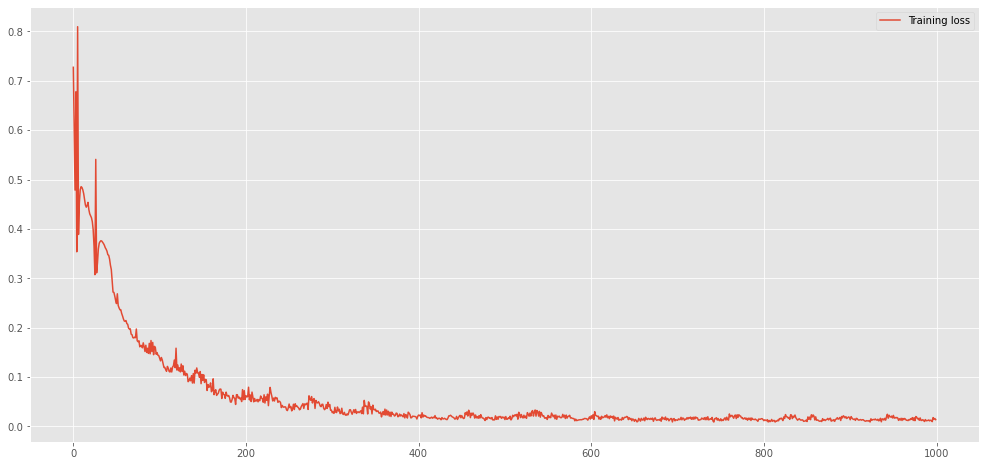

In [28]:
Loss_func = memory.history["loss"]
plt.plot(Loss_func, label= "Training loss")
plt.legend()

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 512)               263168    
_________________________________________________________________
dense (Dense)                (None, 32)                16416     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 280,673
Trainable params: 280,673
Non-trainable params: 0
_________________________________________________________________


In [30]:
score = model.evaluate(X_train, Y_train, verbose = 0)
score #MAE Logcosh

[0.012006474658846855, 0.00015129317762330174]

In [31]:
pred_train = SC.inverse_transform(model.predict(X_train))
pred_test = SC.inverse_transform(model.predict(X_test))

pred = pd.DataFrame(np.concatenate((pred_train,pred_test), axis = 0))

In [32]:
pred

,0
0,172.971115
1,172.130295
2,157.318573
3,130.775101
4,109.554321
...,...
103,851.407837
104,592.778625
105,479.759460
106,585.504089


In [36]:
df.reset_index(inplace=True, drop=True)
df

,Customers
0,114.0
1,120.0
2,134.0
3,67.0
4,123.0
...,...
139,606.0
140,508.0
141,720.0
142,750.0


<function matplotlib.pyplot.show(close=None, block=None)>

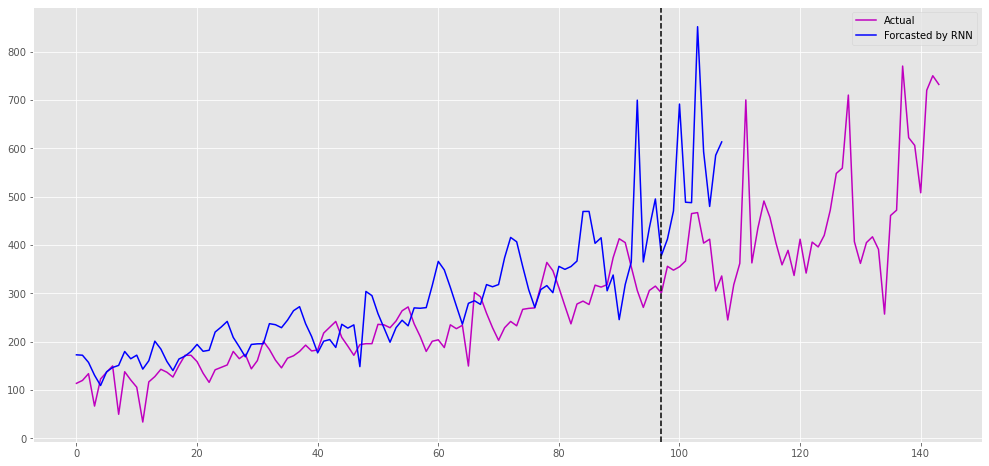

In [34]:
plt.plot(df, color="m")
plt.plot(pred, color="blue")
plt.legend(["Actual","Forcasted by RNN"])
plt.axvline(len(X_train), c= "k", linestyle='dashed')
plt.show

### Long-Short Term Memory (LSTM)

In [35]:
lstm = Sequential()
lstm.add(LSTM(units = 512, activation ="LeakyReLU"))
lstm.add(Dense(32, activation="LeakyReLU"))
lstm.add(Dense(32, activation="LeakyReLU"))
lstm.add(Dense(1, activation="LeakyReLU"))
lstm.compile(loss ="mean_absolute_error", optimizer='adam', metrics="logcosh")
memory_lstm = lstm.fit(X_train, Y_train , epochs = 1000, batch_size = 50, verbose = 1)

Epoch 1/1000
2/2 [==============================] - 2s 114ms/step - loss: 0.6893 - logcosh: 0.3015
Epoch 2/1000
2/2 [==============================] - 0s 115ms/step - loss: 0.5796 - logcosh: 0.2256
Epoch 3/1000
2/2 [==============================] - 0s 111ms/step - loss: 0.4684 - logcosh: 0.1571
Epoch 4/1000
2/2 [==============================] - 0s 115ms/step - loss: 0.5477 - logcosh: 0.2090
Epoch 5/1000
2/2 [==============================] - 0s 114ms/step - loss: 0.4120 - logcosh: 0.1269
Epoch 6/1000
2/2 [==============================] - 0s 132ms/step - loss: 0.3778 - logcosh: 0.1285
Epoch 7/1000
2/2 [==============================] - 0s 139ms/step - loss: 0.3981 - logcosh: 0.1385
Epoch 8/1000
2/2 [==============================] - 0s 142ms/step - loss: 0.4038 - logcosh: 0.1397
Epoch 9/1000
2/2 [==============================] - 0s 142ms/step - loss: 0.3692 - logcosh: 0.1267
Epoch 10/1000
2/2 [==============================] - 0s 141ms/step - loss: 0.3555 - logcosh: 0.1144
Epoch 11/

2/2 [==============================] - 0s 136ms/step - loss: 0.2463 - logcosh: 0.0636
Epoch 84/1000
2/2 [==============================] - 0s 137ms/step - loss: 0.2440 - logcosh: 0.0624
Epoch 85/1000
2/2 [==============================] - 0s 139ms/step - loss: 0.2507 - logcosh: 0.0647
Epoch 86/1000
2/2 [==============================] - 0s 136ms/step - loss: 0.2406 - logcosh: 0.0616
Epoch 87/1000
2/2 [==============================] - 0s 134ms/step - loss: 0.2407 - logcosh: 0.0615
Epoch 88/1000
2/2 [==============================] - 0s 140ms/step - loss: 0.2427 - logcosh: 0.0642
Epoch 89/1000
2/2 [==============================] - 0s 137ms/step - loss: 0.2469 - logcosh: 0.0626
Epoch 90/1000
2/2 [==============================] - 0s 135ms/step - loss: 0.2405 - logcosh: 0.0624
Epoch 91/1000
2/2 [==============================] - 0s 139ms/step - loss: 0.2373 - logcosh: 0.0607
Epoch 92/1000
2/2 [==============================] - 0s 135ms/step - loss: 0.2369 - logcosh: 0.0598
Epoch 93/1000


2/2 [==============================] - 0s 138ms/step - loss: 0.1418 - logcosh: 0.0220
Epoch 246/1000
2/2 [==============================] - 0s 135ms/step - loss: 0.1630 - logcosh: 0.0331
Epoch 247/1000
2/2 [==============================] - 0s 136ms/step - loss: 0.1781 - logcosh: 0.0322
Epoch 248/1000
2/2 [==============================] - 0s 138ms/step - loss: 0.1428 - logcosh: 0.0232
Epoch 249/1000
2/2 [==============================] - 0s 136ms/step - loss: 0.1546 - logcosh: 0.0275
Epoch 250/1000
2/2 [==============================] - 0s 144ms/step - loss: 0.1588 - logcosh: 0.0300
Epoch 251/1000
2/2 [==============================] - 0s 137ms/step - loss: 0.1451 - logcosh: 0.0232
Epoch 252/1000
2/2 [==============================] - 0s 140ms/step - loss: 0.1330 - logcosh: 0.0219
Epoch 253/1000
2/2 [==============================] - 0s 139ms/step - loss: 0.1362 - logcosh: 0.0236
Epoch 254/1000
2/2 [==============================] - 0s 135ms/step - loss: 0.1288 - logcosh: 0.0207
Epoch

2/2 [==============================] - 0s 135ms/step - loss: 0.0735 - logcosh: 0.0073
Epoch 408/1000
2/2 [==============================] - 0s 134ms/step - loss: 0.0637 - logcosh: 0.0066
Epoch 409/1000
2/2 [==============================] - 0s 140ms/step - loss: 0.0661 - logcosh: 0.0069
Epoch 410/1000
2/2 [==============================] - 0s 139ms/step - loss: 0.0577 - logcosh: 0.0054
Epoch 411/1000
2/2 [==============================] - 0s 134ms/step - loss: 0.0624 - logcosh: 0.0064
Epoch 412/1000
2/2 [==============================] - 0s 136ms/step - loss: 0.0614 - logcosh: 0.0067
Epoch 413/1000
2/2 [==============================] - 0s 138ms/step - loss: 0.0722 - logcosh: 0.0078
Epoch 414/1000
2/2 [==============================] - 0s 140ms/step - loss: 0.0683 - logcosh: 0.0068
Epoch 415/1000
2/2 [==============================] - 0s 138ms/step - loss: 0.0667 - logcosh: 0.0063
Epoch 416/1000
2/2 [==============================] - 0s 133ms/step - loss: 0.0624 - logcosh: 0.0060
Epoch

2/2 [==============================] - 0s 140ms/step - loss: 0.0519 - logcosh: 0.0050
Epoch 570/1000
2/2 [==============================] - 0s 135ms/step - loss: 0.0455 - logcosh: 0.0046
Epoch 571/1000
2/2 [==============================] - 0s 150ms/step - loss: 0.0458 - logcosh: 0.0046
Epoch 572/1000
2/2 [==============================] - 0s 139ms/step - loss: 0.0476 - logcosh: 0.0046
Epoch 573/1000
2/2 [==============================] - 0s 133ms/step - loss: 0.0425 - logcosh: 0.0045
Epoch 574/1000
2/2 [==============================] - 0s 136ms/step - loss: 0.0525 - logcosh: 0.0048
Epoch 575/1000
2/2 [==============================] - 0s 138ms/step - loss: 0.0507 - logcosh: 0.0049
Epoch 576/1000
2/2 [==============================] - 0s 133ms/step - loss: 0.0456 - logcosh: 0.0045
Epoch 577/1000
2/2 [==============================] - 0s 139ms/step - loss: 0.0584 - logcosh: 0.0058
Epoch 578/1000
2/2 [==============================] - 0s 138ms/step - loss: 0.0414 - logcosh: 0.0044
Epoch

2/2 [==============================] - 0s 138ms/step - loss: 0.0398 - logcosh: 0.0042
Epoch 732/1000
2/2 [==============================] - 0s 155ms/step - loss: 0.0350 - logcosh: 0.0041
Epoch 733/1000
2/2 [==============================] - 0s 137ms/step - loss: 0.0352 - logcosh: 0.0040
Epoch 734/1000
2/2 [==============================] - 0s 134ms/step - loss: 0.0373 - logcosh: 0.0041
Epoch 735/1000
2/2 [==============================] - 0s 142ms/step - loss: 0.0354 - logcosh: 0.0040
Epoch 736/1000
2/2 [==============================] - 0s 138ms/step - loss: 0.0323 - logcosh: 0.0038
Epoch 737/1000
2/2 [==============================] - 0s 137ms/step - loss: 0.0384 - logcosh: 0.0042
Epoch 738/1000
2/2 [==============================] - 0s 144ms/step - loss: 0.0340 - logcosh: 0.0039
Epoch 739/1000
2/2 [==============================] - 0s 141ms/step - loss: 0.0364 - logcosh: 0.0040
Epoch 740/1000
2/2 [==============================] - 0s 143ms/step - loss: 0.0420 - logcosh: 0.0043
Epoch

2/2 [==============================] - 0s 139ms/step - loss: 0.0363 - logcosh: 0.0040
Epoch 894/1000
2/2 [==============================] - 0s 142ms/step - loss: 0.0342 - logcosh: 0.0040
Epoch 895/1000
2/2 [==============================] - 0s 140ms/step - loss: 0.0377 - logcosh: 0.0042
Epoch 896/1000
2/2 [==============================] - 0s 135ms/step - loss: 0.0360 - logcosh: 0.0040
Epoch 897/1000
2/2 [==============================] - 0s 133ms/step - loss: 0.0342 - logcosh: 0.0039
Epoch 898/1000
2/2 [==============================] - 0s 133ms/step - loss: 0.0371 - logcosh: 0.0041
Epoch 899/1000
2/2 [==============================] - 0s 134ms/step - loss: 0.0371 - logcosh: 0.0044
Epoch 900/1000
2/2 [==============================] - 0s 136ms/step - loss: 0.0343 - logcosh: 0.0042
Epoch 901/1000
2/2 [==============================] - 0s 141ms/step - loss: 0.0381 - logcosh: 0.0041
Epoch 902/1000
2/2 [==============================] - 0s 145ms/step - loss: 0.0300 - logcosh: 0.0038
Epoch

In [36]:
pred_train = SC.inverse_transform(lstm.predict(X_train))
pred_test = SC.inverse_transform(lstm.predict(X_test))

pred = pd.DataFrame(np.concatenate((pred_train,pred_test), axis = 0))

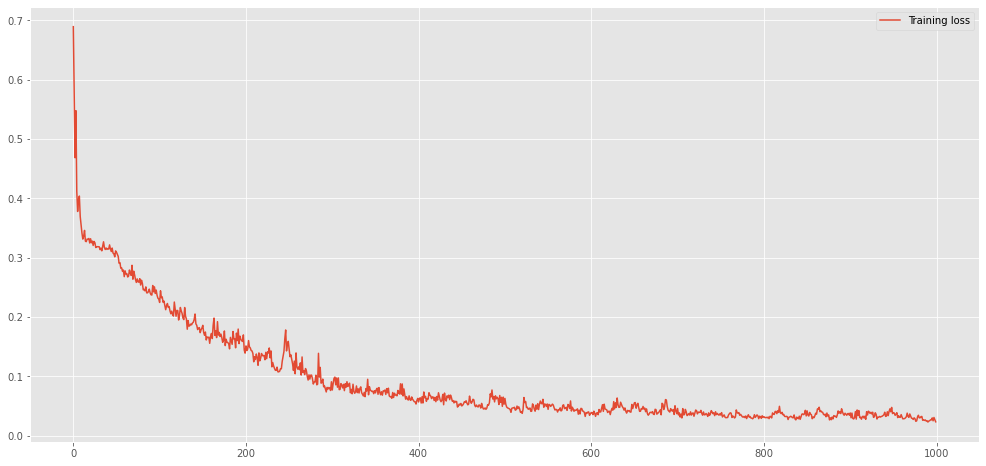

In [37]:
Loss_func = memory_lstm.history["loss"]
plt.plot(Loss_func, label= "Training loss")
plt.legend()

In [38]:
lstm.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 512)               1052672   
_________________________________________________________________
dense_3 (Dense)              (None, 32)                16416     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,070,177
Trainable params: 1,070,177
Non-trainable params: 0
_________________________________________________________________


In [39]:
score = lstm.evaluate(X_train, Y_train, verbose = 0)
score #MAE Logcosh                  #Question: Why is the RNN's performance better than LSTM?!

[0.022001614794135094, 0.0035341389011591673]

<function matplotlib.pyplot.show(close=None, block=None)>

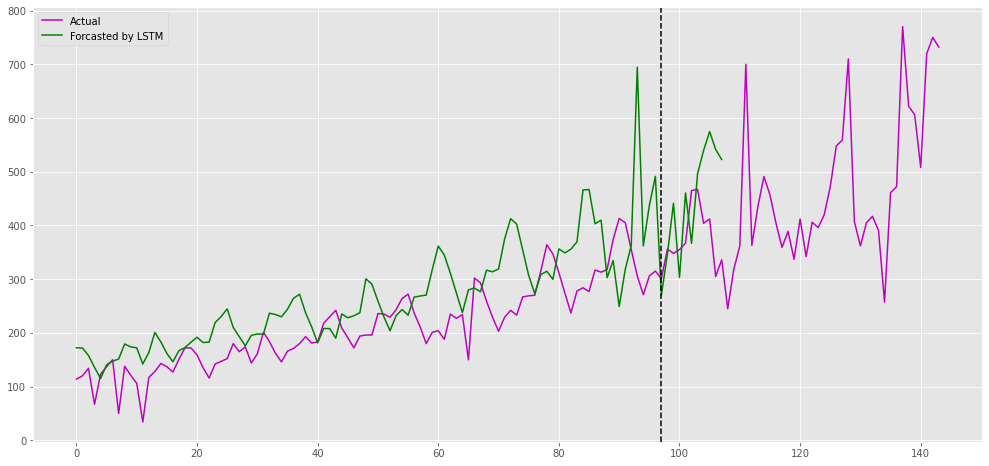

In [40]:
plt.plot(df, color="m")
plt.plot(pred, color="green")
plt.legend(["Actual","Forcasted by LSTM"])
plt.axvline(len(X_train), c= "k", linestyle='dashed')
plt.show

### Bi-LSTM

In [28]:
bilstm = Sequential()
bilstm.add(Bidirectional(LSTM(units = 512, activation ="LeakyReLU")))
bilstm.add(Dense(32, activation="LeakyReLU"))
bilstm.add(Dense(32, activation="LeakyReLU"))
bilstm.add(Dense(1, activation="LeakyReLU"))
bilstm.compile(loss ="mean_absolute_error", optimizer='adam', metrics="logcosh")
memory_bilstm = bilstm.fit(X_train, Y_train , epochs = 1000, batch_size = 50, verbose = 1)

Epoch 1/1000
2/2 [==============================] - 4s 243ms/step - loss: 0.6807 - logcosh: 0.2971
Epoch 2/1000
2/2 [==============================] - 0s 228ms/step - loss: 0.5504 - logcosh: 0.2089
Epoch 3/1000
2/2 [==============================] - 0s 238ms/step - loss: 0.4715 - logcosh: 0.1633
Epoch 4/1000
2/2 [==============================] - 0s 231ms/step - loss: 0.3762 - logcosh: 0.1205
Epoch 5/1000
2/2 [==============================] - 0s 231ms/step - loss: 0.3397 - logcosh: 0.1047
Epoch 6/1000
2/2 [==============================] - 0s 224ms/step - loss: 0.3456 - logcosh: 0.1064
Epoch 7/1000
2/2 [==============================] - 0s 245ms/step - loss: 0.3468 - logcosh: 0.1058
Epoch 8/1000
2/2 [==============================] - 1s 261ms/step - loss: 0.3325 - logcosh: 0.1001
Epoch 9/1000
2/2 [==============================] - 0s 228ms/step - loss: 0.3223 - logcosh: 0.0967
Epoch 10/1000
2/2 [==============================] - 0s 247ms/step - loss: 0.3354 - logcosh: 0.1007
Epoch 11/

2/2 [==============================] - 1s 302ms/step - loss: 0.1967 - logcosh: 0.0491
Epoch 84/1000
2/2 [==============================] - 1s 299ms/step - loss: 0.2133 - logcosh: 0.0534
Epoch 85/1000
2/2 [==============================] - 1s 288ms/step - loss: 0.2101 - logcosh: 0.0531
Epoch 86/1000
2/2 [==============================] - 1s 289ms/step - loss: 0.2128 - logcosh: 0.0524
Epoch 87/1000
2/2 [==============================] - 1s 289ms/step - loss: 0.1985 - logcosh: 0.0477
Epoch 88/1000
2/2 [==============================] - 1s 276ms/step - loss: 0.1978 - logcosh: 0.0513
Epoch 89/1000
2/2 [==============================] - 1s 309ms/step - loss: 0.2034 - logcosh: 0.0527
Epoch 90/1000
2/2 [==============================] - 1s 294ms/step - loss: 0.1970 - logcosh: 0.0479
Epoch 91/1000
2/2 [==============================] - 1s 294ms/step - loss: 0.2222 - logcosh: 0.0554
Epoch 92/1000
2/2 [==============================] - 1s 287ms/step - loss: 0.1872 - logcosh: 0.0477
Epoch 93/1000


2/2 [==============================] - 1s 285ms/step - loss: 0.1437 - logcosh: 0.0377
Epoch 165/1000
2/2 [==============================] - 1s 279ms/step - loss: 0.1488 - logcosh: 0.0384
Epoch 166/1000
2/2 [==============================] - 1s 285ms/step - loss: 0.1417 - logcosh: 0.0390
Epoch 167/1000
2/2 [==============================] - 1s 289ms/step - loss: 0.1354 - logcosh: 0.0386
Epoch 168/1000
2/2 [==============================] - 1s 273ms/step - loss: 0.1444 - logcosh: 0.0390
Epoch 169/1000
2/2 [==============================] - 1s 281ms/step - loss: 0.1421 - logcosh: 0.0370
Epoch 170/1000
2/2 [==============================] - 1s 285ms/step - loss: 0.1420 - logcosh: 0.0387
Epoch 171/1000
2/2 [==============================] - 1s 279ms/step - loss: 0.1344 - logcosh: 0.0379
Epoch 172/1000
2/2 [==============================] - 1s 283ms/step - loss: 0.1402 - logcosh: 0.0375
Epoch 173/1000
2/2 [==============================] - 1s 285ms/step - loss: 0.1346 - logcosh: 0.0369
Epoch

2/2 [==============================] - 1s 298ms/step - loss: 0.1040 - logcosh: 0.0206
Epoch 246/1000
2/2 [==============================] - 1s 279ms/step - loss: 0.1040 - logcosh: 0.0177
Epoch 247/1000
2/2 [==============================] - 1s 279ms/step - loss: 0.1033 - logcosh: 0.0213
Epoch 248/1000
2/2 [==============================] - 1s 283ms/step - loss: 0.0986 - logcosh: 0.0186
Epoch 249/1000
2/2 [==============================] - 1s 279ms/step - loss: 0.1088 - logcosh: 0.0174
Epoch 250/1000
2/2 [==============================] - 1s 280ms/step - loss: 0.1084 - logcosh: 0.0207
Epoch 251/1000
2/2 [==============================] - 1s 280ms/step - loss: 0.0948 - logcosh: 0.0124
Epoch 252/1000
2/2 [==============================] - 1s 282ms/step - loss: 0.1136 - logcosh: 0.0189
Epoch 253/1000
2/2 [==============================] - 1s 280ms/step - loss: 0.1158 - logcosh: 0.0169
Epoch 254/1000
2/2 [==============================] - 1s 282ms/step - loss: 0.1237 - logcosh: 0.0190
Epoch

2/2 [==============================] - 1s 280ms/step - loss: 0.0755 - logcosh: 0.0096
Epoch 327/1000
2/2 [==============================] - 1s 276ms/step - loss: 0.0722 - logcosh: 0.0093
Epoch 328/1000
2/2 [==============================] - 1s 289ms/step - loss: 0.0724 - logcosh: 0.0089
Epoch 329/1000
2/2 [==============================] - 1s 282ms/step - loss: 0.0751 - logcosh: 0.0091
Epoch 330/1000
2/2 [==============================] - 1s 276ms/step - loss: 0.0687 - logcosh: 0.0089
Epoch 331/1000
2/2 [==============================] - 1s 273ms/step - loss: 0.0774 - logcosh: 0.0100
Epoch 332/1000
2/2 [==============================] - 1s 280ms/step - loss: 0.0709 - logcosh: 0.0091
Epoch 333/1000
2/2 [==============================] - 1s 291ms/step - loss: 0.0696 - logcosh: 0.0088
Epoch 334/1000
2/2 [==============================] - 1s 285ms/step - loss: 0.0740 - logcosh: 0.0087
Epoch 335/1000
2/2 [==============================] - 1s 285ms/step - loss: 0.0732 - logcosh: 0.0089
Epoch

2/2 [==============================] - 1s 280ms/step - loss: 0.0754 - logcosh: 0.0097
Epoch 408/1000
2/2 [==============================] - 1s 277ms/step - loss: 0.0653 - logcosh: 0.0078
Epoch 409/1000
2/2 [==============================] - 1s 292ms/step - loss: 0.0645 - logcosh: 0.0068
Epoch 410/1000
2/2 [==============================] - 1s 279ms/step - loss: 0.0719 - logcosh: 0.0085
Epoch 411/1000
2/2 [==============================] - 1s 290ms/step - loss: 0.0753 - logcosh: 0.0075
Epoch 412/1000
2/2 [==============================] - 1s 280ms/step - loss: 0.0670 - logcosh: 0.0071
Epoch 413/1000
2/2 [==============================] - 1s 275ms/step - loss: 0.0712 - logcosh: 0.0076
Epoch 414/1000
2/2 [==============================] - 1s 283ms/step - loss: 0.0688 - logcosh: 0.0073
Epoch 415/1000
2/2 [==============================] - 1s 274ms/step - loss: 0.0672 - logcosh: 0.0069
Epoch 416/1000
2/2 [==============================] - 1s 286ms/step - loss: 0.0674 - logcosh: 0.0068
Epoch

2/2 [==============================] - 1s 317ms/step - loss: 0.0691 - logcosh: 0.0068
Epoch 489/1000
2/2 [==============================] - 1s 296ms/step - loss: 0.0607 - logcosh: 0.0057
Epoch 490/1000
2/2 [==============================] - 1s 307ms/step - loss: 0.0572 - logcosh: 0.0046
Epoch 491/1000
2/2 [==============================] - 1s 280ms/step - loss: 0.0744 - logcosh: 0.0068
Epoch 492/1000
2/2 [==============================] - 1s 278ms/step - loss: 0.0566 - logcosh: 0.0047
Epoch 493/1000
2/2 [==============================] - 1s 294ms/step - loss: 0.0525 - logcosh: 0.0044
Epoch 494/1000
2/2 [==============================] - 1s 282ms/step - loss: 0.0562 - logcosh: 0.0058
Epoch 495/1000
2/2 [==============================] - 1s 287ms/step - loss: 0.0530 - logcosh: 0.0056
Epoch 496/1000
2/2 [==============================] - 1s 297ms/step - loss: 0.0440 - logcosh: 0.0039
Epoch 497/1000
2/2 [==============================] - 1s 285ms/step - loss: 0.0546 - logcosh: 0.0045
Epoch

2/2 [==============================] - 1s 292ms/step - loss: 0.0460 - logcosh: 0.0039
Epoch 570/1000
2/2 [==============================] - 1s 280ms/step - loss: 0.0430 - logcosh: 0.0035
Epoch 571/1000
2/2 [==============================] - 1s 308ms/step - loss: 0.0387 - logcosh: 0.0033
Epoch 572/1000
2/2 [==============================] - 1s 292ms/step - loss: 0.0360 - logcosh: 0.0032
Epoch 573/1000
2/2 [==============================] - 1s 295ms/step - loss: 0.0460 - logcosh: 0.0039
Epoch 574/1000
2/2 [==============================] - 1s 286ms/step - loss: 0.0432 - logcosh: 0.0034
Epoch 575/1000
2/2 [==============================] - 1s 285ms/step - loss: 0.0365 - logcosh: 0.0032
Epoch 576/1000
2/2 [==============================] - 1s 291ms/step - loss: 0.0332 - logcosh: 0.0030
Epoch 577/1000
2/2 [==============================] - 1s 286ms/step - loss: 0.0515 - logcosh: 0.0081
Epoch 578/1000
2/2 [==============================] - 1s 300ms/step - loss: 0.0477 - logcosh: 0.0045
Epoch

2/2 [==============================] - 1s 308ms/step - loss: 0.0284 - logcosh: 0.0025
Epoch 651/1000
2/2 [==============================] - 1s 282ms/step - loss: 0.0327 - logcosh: 0.0025
Epoch 652/1000
2/2 [==============================] - 1s 282ms/step - loss: 0.0269 - logcosh: 0.0022
Epoch 653/1000
2/2 [==============================] - 1s 289ms/step - loss: 0.0293 - logcosh: 0.0025
Epoch 654/1000
2/2 [==============================] - 1s 281ms/step - loss: 0.0328 - logcosh: 0.0026
Epoch 655/1000
2/2 [==============================] - 1s 282ms/step - loss: 0.0343 - logcosh: 0.0027
Epoch 656/1000
2/2 [==============================] - 1s 318ms/step - loss: 0.0374 - logcosh: 0.0029
Epoch 657/1000
2/2 [==============================] - 1s 290ms/step - loss: 0.0337 - logcosh: 0.0026
Epoch 658/1000
2/2 [==============================] - 1s 322ms/step - loss: 0.0403 - logcosh: 0.0032
Epoch 659/1000
2/2 [==============================] - 1s 303ms/step - loss: 0.0367 - logcosh: 0.0036
Epoch

2/2 [==============================] - 1s 290ms/step - loss: 0.0247 - logcosh: 7.7977e-04
Epoch 732/1000
2/2 [==============================] - 1s 290ms/step - loss: 0.0270 - logcosh: 7.2737e-04
Epoch 733/1000
2/2 [==============================] - 1s 306ms/step - loss: 0.0286 - logcosh: 0.0012
Epoch 734/1000
2/2 [==============================] - 1s 278ms/step - loss: 0.0204 - logcosh: 4.5155e-04
Epoch 735/1000
2/2 [==============================] - 1s 292ms/step - loss: 0.0217 - logcosh: 4.6577e-04
Epoch 736/1000
2/2 [==============================] - 1s 284ms/step - loss: 0.0220 - logcosh: 4.6930e-04
Epoch 737/1000
2/2 [==============================] - 1s 284ms/step - loss: 0.0200 - logcosh: 4.1310e-04
Epoch 738/1000
2/2 [==============================] - 1s 279ms/step - loss: 0.0225 - logcosh: 3.8450e-04
Epoch 739/1000
2/2 [==============================] - 1s 284ms/step - loss: 0.0229 - logcosh: 4.5331e-04
Epoch 740/1000
2/2 [==============================] - 1s 288ms/step - loss

2/2 [==============================] - 1s 292ms/step - loss: 0.0246 - logcosh: 4.8952e-04
Epoch 810/1000
2/2 [==============================] - 1s 288ms/step - loss: 0.0224 - logcosh: 6.0012e-04
Epoch 811/1000
2/2 [==============================] - 1s 289ms/step - loss: 0.0192 - logcosh: 3.2981e-04
Epoch 812/1000
2/2 [==============================] - 1s 283ms/step - loss: 0.0193 - logcosh: 3.6123e-04
Epoch 813/1000
2/2 [==============================] - 1s 297ms/step - loss: 0.0181 - logcosh: 2.7948e-04
Epoch 814/1000
2/2 [==============================] - 1s 283ms/step - loss: 0.0218 - logcosh: 4.6088e-04
Epoch 815/1000
2/2 [==============================] - 1s 287ms/step - loss: 0.0175 - logcosh: 2.6307e-04
Epoch 816/1000
2/2 [==============================] - 1s 290ms/step - loss: 0.0223 - logcosh: 4.1922e-04
Epoch 817/1000
2/2 [==============================] - 1s 285ms/step - loss: 0.0221 - logcosh: 4.0356e-04
Epoch 818/1000
2/2 [==============================] - 1s 293ms/step - 

2/2 [==============================] - 1s 284ms/step - loss: 0.0206 - logcosh: 4.0245e-04
Epoch 888/1000
2/2 [==============================] - 1s 279ms/step - loss: 0.0213 - logcosh: 4.3756e-04
Epoch 889/1000
2/2 [==============================] - 1s 282ms/step - loss: 0.0203 - logcosh: 3.7607e-04
Epoch 890/1000
2/2 [==============================] - 1s 280ms/step - loss: 0.0202 - logcosh: 4.8765e-04
Epoch 891/1000
2/2 [==============================] - 1s 286ms/step - loss: 0.0269 - logcosh: 5.8763e-04
Epoch 892/1000
2/2 [==============================] - 1s 284ms/step - loss: 0.0191 - logcosh: 3.2515e-04
Epoch 893/1000
2/2 [==============================] - 1s 286ms/step - loss: 0.0315 - logcosh: 0.0010
Epoch 894/1000
2/2 [==============================] - 1s 289ms/step - loss: 0.0290 - logcosh: 8.4452e-04
Epoch 895/1000
2/2 [==============================] - 1s 292ms/step - loss: 0.0306 - logcosh: 7.8577e-04
Epoch 896/1000
2/2 [==============================] - 1s 285ms/step - loss

2/2 [==============================] - 1s 285ms/step - loss: 0.0220 - logcosh: 3.8205e-04
Epoch 966/1000
2/2 [==============================] - 1s 301ms/step - loss: 0.0186 - logcosh: 3.1104e-04
Epoch 967/1000
2/2 [==============================] - 1s 291ms/step - loss: 0.0223 - logcosh: 4.4986e-04
Epoch 968/1000
2/2 [==============================] - 1s 298ms/step - loss: 0.0206 - logcosh: 3.7010e-04
Epoch 969/1000
2/2 [==============================] - 1s 298ms/step - loss: 0.0225 - logcosh: 4.9798e-04
Epoch 970/1000
2/2 [==============================] - 1s 282ms/step - loss: 0.0184 - logcosh: 2.8061e-04
Epoch 971/1000
2/2 [==============================] - 1s 295ms/step - loss: 0.0202 - logcosh: 3.4217e-04
Epoch 972/1000
2/2 [==============================] - 1s 288ms/step - loss: 0.0278 - logcosh: 5.9382e-04
Epoch 973/1000
2/2 [==============================] - 1s 299ms/step - loss: 0.0218 - logcosh: 3.6886e-04
Epoch 974/1000
2/2 [==============================] - 1s 300ms/step - 

In [29]:
pred_train = SC.inverse_transform(bilstm.predict(X_train))
pred_test = SC.inverse_transform(bilstm.predict(X_test))

pred = pd.DataFrame(np.concatenate((pred_train,pred_test), axis = 0))

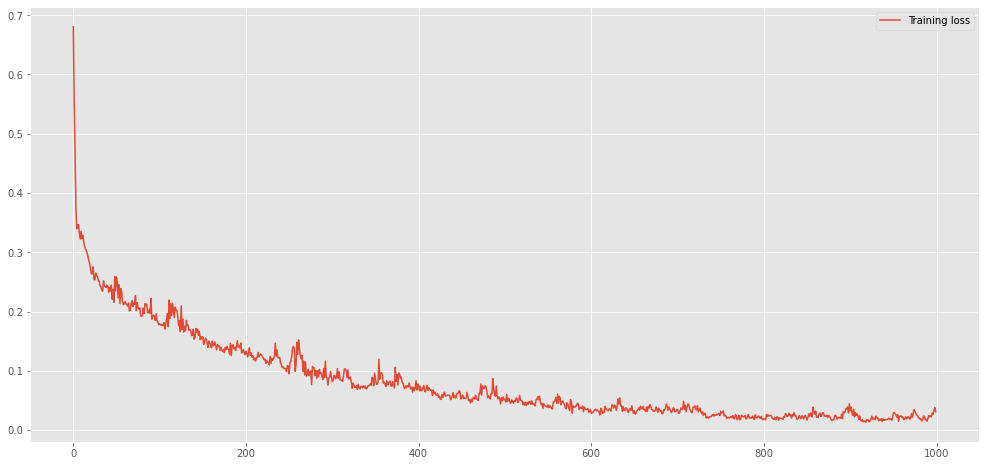

In [30]:
Loss_func = memory_bilstm.history["loss"] 
plt.plot(Loss_func, label= "Training loss")
plt.legend() # People may argue why I have schosen 1000 iterations, but the following diagram is self-descriptive!

In [31]:
bilstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 1024)              2105344   
_________________________________________________________________
dense (Dense)                (None, 32)                32800     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,139,233
Trainable params: 2,139,233
Non-trainable params: 0
_________________________________________________________________


In [32]:
score = bilstm.evaluate(X_train, Y_train, verbose = 0)
score #MAE Logcosh 

[0.03272155299782753, 0.0009358070674352348]

<function matplotlib.pyplot.show(close=None, block=None)>

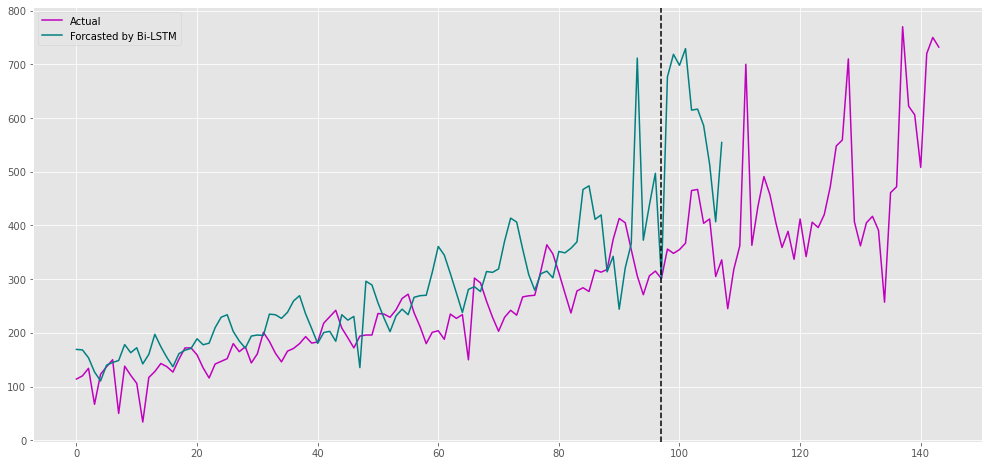

In [38]:
plt.plot(df, color="m")
plt.plot(pred, color="teal")
plt.legend(["Actual","Forcasted by Bi-LSTM"])
plt.axvline(len(X_train), c= "k", linestyle='dashed')
plt.show

### Gated Recurrent Unit (GRU)

In [41]:
gru = Sequential()
gru.add(GRU(units = 512, activation ="LeakyReLU"))
gru.add(Dense(32, activation="LeakyReLU"))
gru.add(Dense(32, activation="LeakyReLU"))
gru.add(Dense(1, activation="LeakyReLU"))
gru.compile(loss ="mean_absolute_error", optimizer='adam', metrics="logcosh")
memory_gru = gru.fit(X_train, Y_train , epochs = 1000, batch_size = 50, verbose = 1)

Epoch 1/1000
2/2 [==============================] - 2s 108ms/step - loss: 0.6907 - logcosh: 0.3050
Epoch 2/1000
2/2 [==============================] - 0s 110ms/step - loss: 0.6418 - logcosh: 0.2698
Epoch 3/1000
2/2 [==============================] - 0s 115ms/step - loss: 0.5654 - logcosh: 0.2223
Epoch 4/1000
2/2 [==============================] - 0s 111ms/step - loss: 0.4640 - logcosh: 0.1579
Epoch 5/1000
2/2 [==============================] - 0s 102ms/step - loss: 0.4274 - logcosh: 0.1459
Epoch 6/1000
2/2 [==============================] - 0s 104ms/step - loss: 0.4226 - logcosh: 0.1455
Epoch 7/1000
2/2 [==============================] - 0s 105ms/step - loss: 0.3564 - logcosh: 0.1090
Epoch 8/1000
2/2 [==============================] - 0s 109ms/step - loss: 0.3602 - logcosh: 0.1090
Epoch 9/1000
2/2 [==============================] - 0s 104ms/step - loss: 0.3577 - logcosh: 0.1111
Epoch 10/1000
2/2 [==============================] - 0s 117ms/step - loss: 0.3487 - logcosh: 0.1123
Epoch 11/

2/2 [==============================] - 0s 125ms/step - loss: 0.2221 - logcosh: 0.0570
Epoch 84/1000
2/2 [==============================] - 0s 140ms/step - loss: 0.2054 - logcosh: 0.0541
Epoch 85/1000
2/2 [==============================] - 0s 140ms/step - loss: 0.2210 - logcosh: 0.0572
Epoch 86/1000
2/2 [==============================] - 0s 140ms/step - loss: 0.2062 - logcosh: 0.0535
Epoch 87/1000
2/2 [==============================] - 0s 130ms/step - loss: 0.2237 - logcosh: 0.0578
Epoch 88/1000
2/2 [==============================] - 0s 135ms/step - loss: 0.2136 - logcosh: 0.0565
Epoch 89/1000
2/2 [==============================] - 0s 132ms/step - loss: 0.2133 - logcosh: 0.0573
Epoch 90/1000
2/2 [==============================] - 0s 122ms/step - loss: 0.2000 - logcosh: 0.0518
Epoch 91/1000
2/2 [==============================] - 0s 125ms/step - loss: 0.1996 - logcosh: 0.0515
Epoch 92/1000
2/2 [==============================] - 0s 134ms/step - loss: 0.2000 - logcosh: 0.0517
Epoch 93/1000


2/2 [==============================] - 0s 129ms/step - loss: 0.1534 - logcosh: 0.0372
Epoch 165/1000
2/2 [==============================] - 0s 126ms/step - loss: 0.1594 - logcosh: 0.0399
Epoch 166/1000
2/2 [==============================] - 0s 133ms/step - loss: 0.1373 - logcosh: 0.0362
Epoch 167/1000
2/2 [==============================] - 0s 123ms/step - loss: 0.1459 - logcosh: 0.0369
Epoch 168/1000
2/2 [==============================] - 0s 141ms/step - loss: 0.1429 - logcosh: 0.0360
Epoch 169/1000
2/2 [==============================] - 0s 161ms/step - loss: 0.1438 - logcosh: 0.0375
Epoch 170/1000
2/2 [==============================] - 0s 181ms/step - loss: 0.1389 - logcosh: 0.0358
Epoch 171/1000
2/2 [==============================] - 0s 145ms/step - loss: 0.1420 - logcosh: 0.0353
Epoch 172/1000
2/2 [==============================] - 0s 138ms/step - loss: 0.1393 - logcosh: 0.0350
Epoch 173/1000
2/2 [==============================] - 0s 123ms/step - loss: 0.1402 - logcosh: 0.0357
Epoch

2/2 [==============================] - 0s 122ms/step - loss: 0.1156 - logcosh: 0.0153
Epoch 246/1000
2/2 [==============================] - 0s 109ms/step - loss: 0.1028 - logcosh: 0.0132
Epoch 247/1000
2/2 [==============================] - 0s 109ms/step - loss: 0.0938 - logcosh: 0.0119
Epoch 248/1000
2/2 [==============================] - 0s 123ms/step - loss: 0.1021 - logcosh: 0.0131
Epoch 249/1000
2/2 [==============================] - 0s 111ms/step - loss: 0.1087 - logcosh: 0.0145
Epoch 250/1000
2/2 [==============================] - 0s 110ms/step - loss: 0.1125 - logcosh: 0.0169
Epoch 251/1000
2/2 [==============================] - 0s 107ms/step - loss: 0.1154 - logcosh: 0.0183
Epoch 252/1000
2/2 [==============================] - 0s 108ms/step - loss: 0.0883 - logcosh: 0.0113
Epoch 253/1000
2/2 [==============================] - 0s 127ms/step - loss: 0.1187 - logcosh: 0.0211
Epoch 254/1000
2/2 [==============================] - 0s 115ms/step - loss: 0.1169 - logcosh: 0.0213
Epoch

2/2 [==============================] - 0s 114ms/step - loss: 0.0769 - logcosh: 0.0090
Epoch 327/1000
2/2 [==============================] - 0s 108ms/step - loss: 0.0866 - logcosh: 0.0103
Epoch 328/1000
2/2 [==============================] - 0s 108ms/step - loss: 0.0785 - logcosh: 0.0091
Epoch 329/1000
2/2 [==============================] - 0s 112ms/step - loss: 0.0854 - logcosh: 0.0109
Epoch 330/1000
2/2 [==============================] - 0s 106ms/step - loss: 0.0762 - logcosh: 0.0092
Epoch 331/1000
2/2 [==============================] - 0s 113ms/step - loss: 0.0848 - logcosh: 0.0117
Epoch 332/1000
2/2 [==============================] - 0s 110ms/step - loss: 0.0989 - logcosh: 0.0135
Epoch 333/1000
2/2 [==============================] - 0s 107ms/step - loss: 0.0741 - logcosh: 0.0091
Epoch 334/1000
2/2 [==============================] - 0s 124ms/step - loss: 0.0923 - logcosh: 0.0115
Epoch 335/1000
2/2 [==============================] - 0s 104ms/step - loss: 0.1001 - logcosh: 0.0121
Epoch

2/2 [==============================] - 0s 109ms/step - loss: 0.0643 - logcosh: 0.0064
Epoch 408/1000
2/2 [==============================] - 0s 108ms/step - loss: 0.0871 - logcosh: 0.0086
Epoch 409/1000
2/2 [==============================] - 0s 112ms/step - loss: 0.0670 - logcosh: 0.0081
Epoch 410/1000
2/2 [==============================] - 0s 112ms/step - loss: 0.0799 - logcosh: 0.0093
Epoch 411/1000
2/2 [==============================] - 0s 106ms/step - loss: 0.0725 - logcosh: 0.0080
Epoch 412/1000
2/2 [==============================] - 0s 109ms/step - loss: 0.0769 - logcosh: 0.0078
Epoch 413/1000
2/2 [==============================] - 0s 111ms/step - loss: 0.0733 - logcosh: 0.0079
Epoch 414/1000
2/2 [==============================] - 0s 107ms/step - loss: 0.0877 - logcosh: 0.0111
Epoch 415/1000
2/2 [==============================] - 0s 107ms/step - loss: 0.0650 - logcosh: 0.0068
Epoch 416/1000
2/2 [==============================] - 0s 107ms/step - loss: 0.0745 - logcosh: 0.0092
Epoch

2/2 [==============================] - 0s 106ms/step - loss: 0.0498 - logcosh: 0.0048
Epoch 489/1000
2/2 [==============================] - 0s 127ms/step - loss: 0.0524 - logcosh: 0.0053
Epoch 490/1000
2/2 [==============================] - 0s 114ms/step - loss: 0.0503 - logcosh: 0.0048
Epoch 491/1000
2/2 [==============================] - 0s 108ms/step - loss: 0.0452 - logcosh: 0.0044
Epoch 492/1000
2/2 [==============================] - 0s 111ms/step - loss: 0.0474 - logcosh: 0.0047
Epoch 493/1000
2/2 [==============================] - 0s 104ms/step - loss: 0.0442 - logcosh: 0.0049
Epoch 494/1000
2/2 [==============================] - 0s 107ms/step - loss: 0.0403 - logcosh: 0.0042
Epoch 495/1000
2/2 [==============================] - 0s 106ms/step - loss: 0.0446 - logcosh: 0.0057
Epoch 496/1000
2/2 [==============================] - 0s 107ms/step - loss: 0.0458 - logcosh: 0.0050
Epoch 497/1000
2/2 [==============================] - 0s 108ms/step - loss: 0.0419 - logcosh: 0.0043
Epoch

2/2 [==============================] - 0s 111ms/step - loss: 0.0406 - logcosh: 0.0044
Epoch 570/1000
2/2 [==============================] - 0s 116ms/step - loss: 0.0437 - logcosh: 0.0047
Epoch 571/1000
2/2 [==============================] - 0s 104ms/step - loss: 0.0325 - logcosh: 0.0038
Epoch 572/1000
2/2 [==============================] - 0s 106ms/step - loss: 0.0380 - logcosh: 0.0044
Epoch 573/1000
2/2 [==============================] - 0s 107ms/step - loss: 0.0337 - logcosh: 0.0040
Epoch 574/1000
2/2 [==============================] - 0s 108ms/step - loss: 0.0389 - logcosh: 0.0041
Epoch 575/1000
2/2 [==============================] - 0s 105ms/step - loss: 0.0311 - logcosh: 0.0036
Epoch 576/1000
2/2 [==============================] - 0s 106ms/step - loss: 0.0443 - logcosh: 0.0044
Epoch 577/1000
2/2 [==============================] - 0s 110ms/step - loss: 0.0336 - logcosh: 0.0038
Epoch 578/1000
2/2 [==============================] - 0s 111ms/step - loss: 0.0386 - logcosh: 0.0041
Epoch

2/2 [==============================] - 0s 110ms/step - loss: 0.0373 - logcosh: 0.0042
Epoch 651/1000
2/2 [==============================] - 0s 110ms/step - loss: 0.0312 - logcosh: 0.0036
Epoch 652/1000
2/2 [==============================] - 0s 108ms/step - loss: 0.0352 - logcosh: 0.0038
Epoch 653/1000
2/2 [==============================] - 0s 107ms/step - loss: 0.0384 - logcosh: 0.0040
Epoch 654/1000
2/2 [==============================] - 0s 104ms/step - loss: 0.0324 - logcosh: 0.0037
Epoch 655/1000
2/2 [==============================] - 0s 110ms/step - loss: 0.0330 - logcosh: 0.0041
Epoch 656/1000
2/2 [==============================] - 0s 109ms/step - loss: 0.0336 - logcosh: 0.0038
Epoch 657/1000
2/2 [==============================] - 0s 107ms/step - loss: 0.0317 - logcosh: 0.0036
Epoch 658/1000
2/2 [==============================] - 0s 109ms/step - loss: 0.0321 - logcosh: 0.0036
Epoch 659/1000
2/2 [==============================] - 0s 107ms/step - loss: 0.0309 - logcosh: 0.0036
Epoch

2/2 [==============================] - 0s 108ms/step - loss: 0.0289 - logcosh: 0.0035
Epoch 732/1000
2/2 [==============================] - 0s 118ms/step - loss: 0.0328 - logcosh: 0.0040
Epoch 733/1000
2/2 [==============================] - 0s 107ms/step - loss: 0.0259 - logcosh: 0.0034
Epoch 734/1000
2/2 [==============================] - 0s 114ms/step - loss: 0.0275 - logcosh: 0.0034
Epoch 735/1000
2/2 [==============================] - 0s 112ms/step - loss: 0.0271 - logcosh: 0.0033
Epoch 736/1000
2/2 [==============================] - 0s 114ms/step - loss: 0.0272 - logcosh: 0.0035
Epoch 737/1000
2/2 [==============================] - 0s 113ms/step - loss: 0.0310 - logcosh: 0.0037
Epoch 738/1000
2/2 [==============================] - 0s 113ms/step - loss: 0.0228 - logcosh: 0.0032
Epoch 739/1000
2/2 [==============================] - 0s 105ms/step - loss: 0.0303 - logcosh: 0.0036
Epoch 740/1000
2/2 [==============================] - 0s 110ms/step - loss: 0.0298 - logcosh: 0.0036
Epoch

2/2 [==============================] - 0s 110ms/step - loss: 0.0319 - logcosh: 0.0036
Epoch 813/1000
2/2 [==============================] - 0s 105ms/step - loss: 0.0328 - logcosh: 0.0036
Epoch 814/1000
2/2 [==============================] - 0s 108ms/step - loss: 0.0314 - logcosh: 0.0036
Epoch 815/1000
2/2 [==============================] - 0s 121ms/step - loss: 0.0318 - logcosh: 0.0034
Epoch 816/1000
2/2 [==============================] - 0s 107ms/step - loss: 0.0302 - logcosh: 0.0035
Epoch 817/1000
2/2 [==============================] - 0s 108ms/step - loss: 0.0301 - logcosh: 0.0037
Epoch 818/1000
2/2 [==============================] - 0s 111ms/step - loss: 0.0259 - logcosh: 0.0035
Epoch 819/1000
2/2 [==============================] - 0s 110ms/step - loss: 0.0389 - logcosh: 0.0036
Epoch 820/1000
2/2 [==============================] - 0s 106ms/step - loss: 0.0351 - logcosh: 0.0036
Epoch 821/1000
2/2 [==============================] - 0s 116ms/step - loss: 0.0310 - logcosh: 0.0036
Epoch

2/2 [==============================] - 0s 108ms/step - loss: 0.0315 - logcosh: 0.0033
Epoch 894/1000
2/2 [==============================] - 0s 119ms/step - loss: 0.0267 - logcosh: 0.0030
Epoch 895/1000
2/2 [==============================] - 0s 111ms/step - loss: 0.0369 - logcosh: 0.0033
Epoch 896/1000
2/2 [==============================] - 0s 112ms/step - loss: 0.0250 - logcosh: 0.0030
Epoch 897/1000
2/2 [==============================] - 0s 112ms/step - loss: 0.0301 - logcosh: 0.0031
Epoch 898/1000
2/2 [==============================] - 0s 115ms/step - loss: 0.0251 - logcosh: 0.0028
Epoch 899/1000
2/2 [==============================] - 0s 108ms/step - loss: 0.0259 - logcosh: 0.0029
Epoch 900/1000
2/2 [==============================] - 0s 112ms/step - loss: 0.0286 - logcosh: 0.0031
Epoch 901/1000
2/2 [==============================] - 0s 112ms/step - loss: 0.0290 - logcosh: 0.0032
Epoch 902/1000
2/2 [==============================] - 0s 118ms/step - loss: 0.0337 - logcosh: 0.0034
Epoch

2/2 [==============================] - 0s 112ms/step - loss: 0.0218 - logcosh: 0.0016
Epoch 975/1000
2/2 [==============================] - 0s 112ms/step - loss: 0.0178 - logcosh: 0.0014
Epoch 976/1000
2/2 [==============================] - 0s 125ms/step - loss: 0.0221 - logcosh: 0.0012
Epoch 977/1000
2/2 [==============================] - 0s 111ms/step - loss: 0.0276 - logcosh: 0.0013
Epoch 978/1000
2/2 [==============================] - 0s 105ms/step - loss: 0.0258 - logcosh: 0.0017
Epoch 979/1000
2/2 [==============================] - 0s 108ms/step - loss: 0.0260 - logcosh: 0.0014
Epoch 980/1000
2/2 [==============================] - 0s 115ms/step - loss: 0.0229 - logcosh: 0.0011
Epoch 981/1000
2/2 [==============================] - 0s 111ms/step - loss: 0.0232 - logcosh: 0.0012
Epoch 982/1000
2/2 [==============================] - 0s 113ms/step - loss: 0.0268 - logcosh: 0.0012
Epoch 983/1000
2/2 [==============================] - 0s 108ms/step - loss: 0.0265 - logcosh: 0.0012
Epoch

In [42]:
pred_train = SC.inverse_transform(gru.predict(X_train))
pred_test = SC.inverse_transform(gru.predict(X_test))

pred = pd.DataFrame(np.concatenate((pred_train,pred_test), axis = 0))

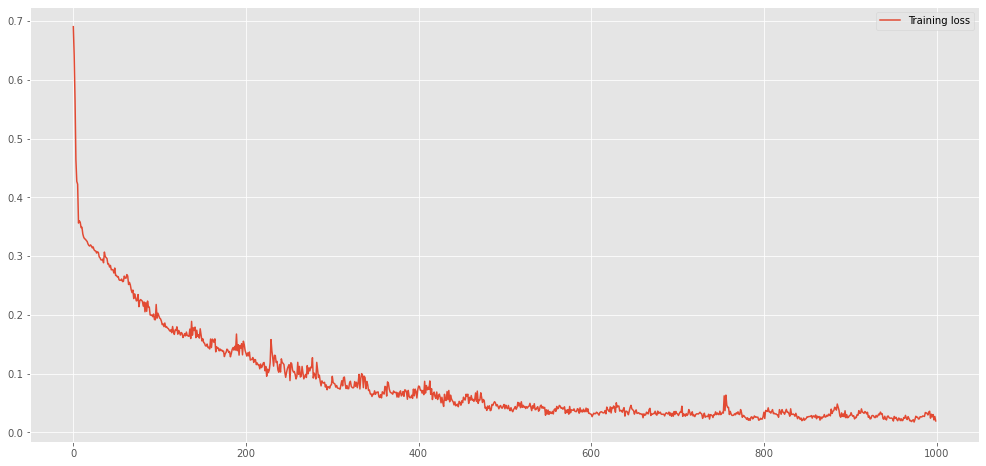

In [43]:
Loss_func = memory_gru.history["loss"] 
plt.plot(Loss_func, label= "Training loss")
plt.legend() 

In [44]:
gru.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 512)               791040    
_________________________________________________________________
dense_3 (Dense)              (None, 32)                16416     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 808,545
Trainable params: 808,545
Non-trainable params: 0
_________________________________________________________________


In [45]:
score = gru.evaluate(X_train, Y_train, verbose = 0)
score #MAE Logcosh 

[0.02342870645225048, 0.00044783917837776244]

### <font color='steelblue'> By comparing the values for RNN, LSTM, Bi-LSTM, and GRU, it can be stated that (surprisingly) RNN performed best! </font>

<function matplotlib.pyplot.show(close=None, block=None)>

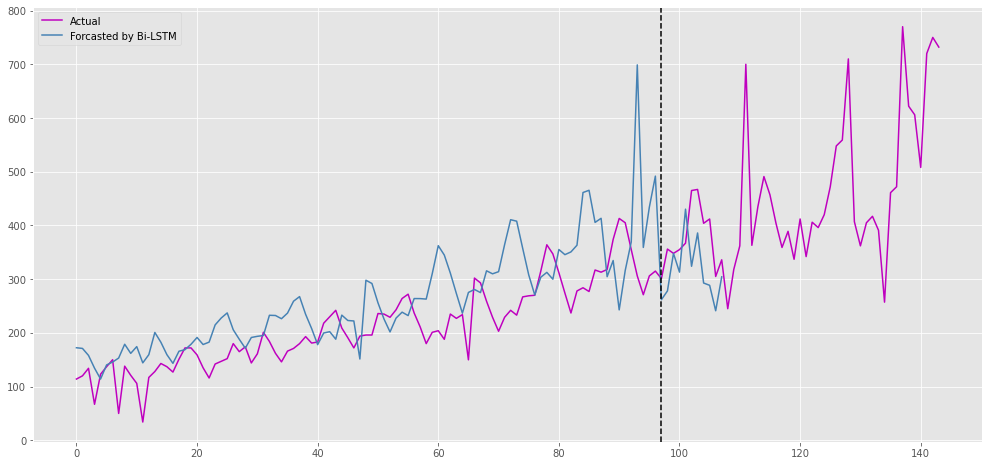

In [47]:
plt.plot(df, color="m")
plt.plot(pred, color="steelblue")
plt.legend(["Actual","Forcasted by Bi-LSTM"])
plt.axvline(len(X_train), c= "k", linestyle='dashed')
plt.show